# Семинар 3: Линейная регрессия, sklearn, регуляризация.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Murcha1990/ML_math_2022/blob/main/Семинары/sem03-linreg.ipynb)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

def plot(x, y_true, y_pred=None):
    plt.scatter(x, y_true, label='true', color='blue')
    if y_pred is not None:
        plt.plot(x, y_pred, label='pred', color='red')
    plt.legend()

## Линейная регрессия, точное решение



Дано:

матрица объекты-признаки $X$

целевая переменная $y$

Строим модели вида:

$\hat{y} = Xw + \varepsilon$

где $w$ - вектор весов признаков, $\varepsilon$ - случайная компонента (данные неидеальны, поэтому без случайной компоненты не обойтись)

Оценка качества - MSE (среднеквадратическая ошибка): $$MSE(y, \hat{y}) = \frac{1}{l}\sum_{i=1}^l (y_i - \hat{y}_i)^2$$

Чем меньше MSE, тем лучше модель.


Как найти наилучший $w$?

Идея: найти $w$, при котором достигается минимум MSE

$$\hat{w} = (X^T X)^{-1}X^T y$$

Преимущества:


*   Готовая формула
*   Теоретическое обоснование

Надостатки:


*   Сложность обращения матрицы
*   Проблемы с $X^T X$ - может быть вырожденной или плохо обусловленной





### Сгенерируем точки для задачи регрессии

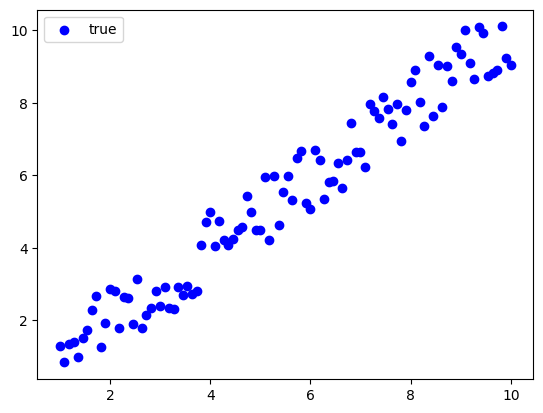

In [ ]:
num_points = 100
m, b, delta = 1, 0, 1

x = np.linspace(1, 10, num_points)
y = m * x + b + np.random.uniform(-delta, delta, num_points)

plot(x, y)

In [ ]:
x.shape

(100,)

In [ ]:
x.reshape((-1, 1)).shape

(100, 1)

In [ ]:
def linear_regression(x, y):
  x = x.reshape((-1, 1))
  w = np.linalg.inv(x.T @ x) @ x.T @ y
  return w

### Обучим нашу линейную регрессию и посмотрим на результат

In [ ]:
w = linear_regression(x, y)

In [ ]:
w.shape

(1,)

In [ ]:
w

array([0.98920149])

MSE: 0.3578968919314023


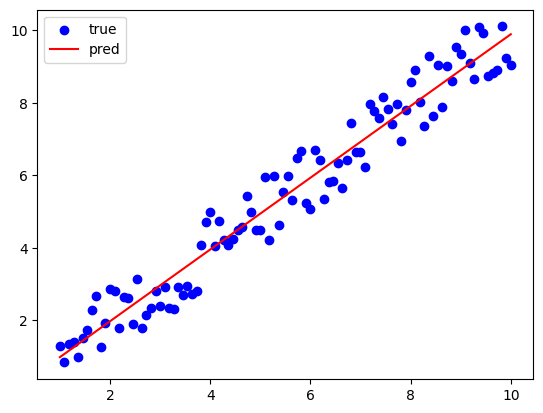

In [ ]:
w = linear_regression(x, y)

y_pred = w * x
plot(x, y, y_pred)

print(f'MSE: {np.mean((y - y_pred)**2)}')

### Загрузим данные

<!-- def some_noisy_function(x, noise):
    num_points = x.shape[0]
    return .2 * x + 1.3 * np.sin(x) - .06 * x ** 2 + noise * np.random.uniform(-noise, noise, num_points) -->

In [ ]:
import pickle
!wget https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/data/sem03-data.pkl

x, y = pickle.load(open('sem03-data.pkl', 'rb'))

--2024-01-31 08:53:08--  https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/data/sem03-data.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1785 (1.7K) [application/octet-stream]
Saving to: ‘sem03-data.pkl’

sem03-data.pkl      100%[===================>]   1.74K  --.-KB/s    in 0s      

2024-01-31 08:53:08 (17.7 MB/s) - ‘sem03-data.pkl’ saved [1785/1785]



In [ ]:
x.shape

(100,)

### Обучим модель

MSE: 2.952085293253289


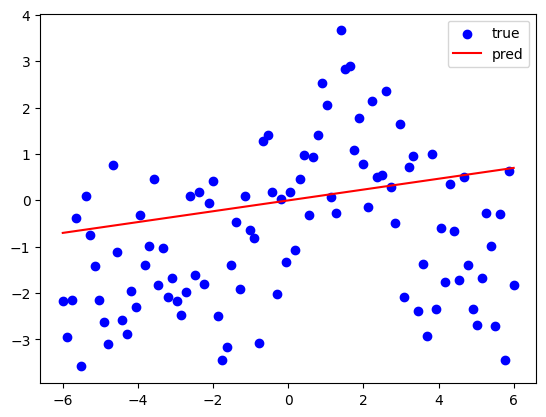

In [ ]:
w = linear_regression(x, y)

y_pred = w * x

plot(x, y, y_pred)
print(f'MSE: {np.mean((y - y_pred) ** 2)}')

## Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

MSE: 2.46713193783275


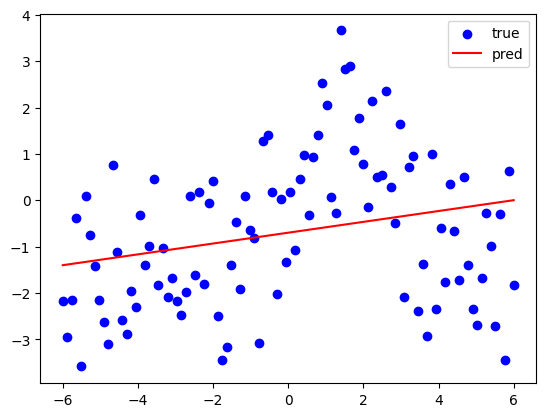

In [ ]:
features = x.reshape(-1, 1)

lr.fit(features, y)
y_pred = lr.predict(features)

plot(x, y, y_pred)
print(f'MSE: {mean_squared_error(y, y_pred)}')

### Как улучшить?

**Подсказка:** вместо $x$ использовать какую-то функцию $f(x)$


In [ ]:
np.concatenate([x.reshape((-1, 1)), x.reshape((-1, 1))**2], axis=1)

MSE: 1.4203959355156721


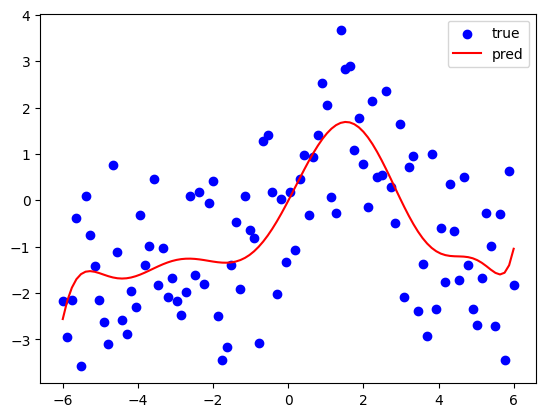

In [ ]:


def get_features2(x):
    x = x.reshape((-1, 1))

    return np.concatenate([x, x**2, x**3, x**4, x ** 5, x**6, x**7, x**8,x **9, x ** 10], axis=1)

features = get_features2(x)

lr2 = LinearRegression().fit(features, y)
y_pred = lr2.predict(features)

plot(x, y, y_pred)
print(f'MSE: {mean_squared_error(y, y_pred)}')

In [ ]:
10 ** 10 * 1e-6

10000.0

### Протестируем:

In [ ]:
!wget https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/data/sem03-test-data.pkl
x_test, y_test = pickle.load(open('sem03-test-data.pkl', 'rb'))

def test(model, features):
    y_pred = lr.predict(features)
    plt.axvspan(-6, 6, alpha=0.1, color='green')
    plot(x_test, y_test, y_pred)
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')

--2024-01-31 09:06:20--  https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80%D1%8B/data/sem03-test-data.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1785 (1.7K) [application/octet-stream]
Saving to: ‘sem03-test-data.pkl’

sem03-test-data.pkl 100%[===================>]   1.74K  --.-KB/s    in 0s      

2024-01-31 09:06:20 (15.1 MB/s) - ‘sem03-test-data.pkl’ saved [1785/1785]



MSE: 6.9306483392482505


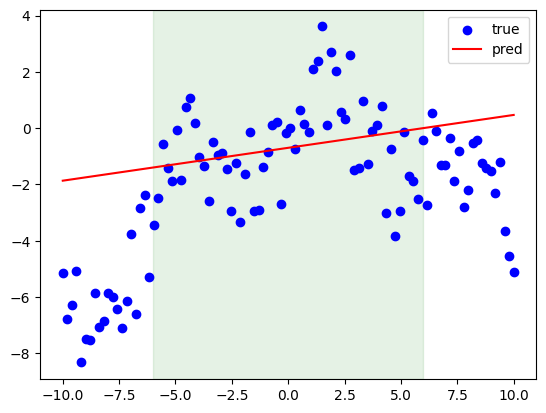

In [ ]:
y_pred = lr.predict(x_test.reshape(-1, 1))

plt.axvspan(-6, 6, alpha=0.1, color='green')
plot(x_test, y_test, y_pred)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

In [ ]:
lr.coef_

array([0.11682567])

MSE: 740836.796373581


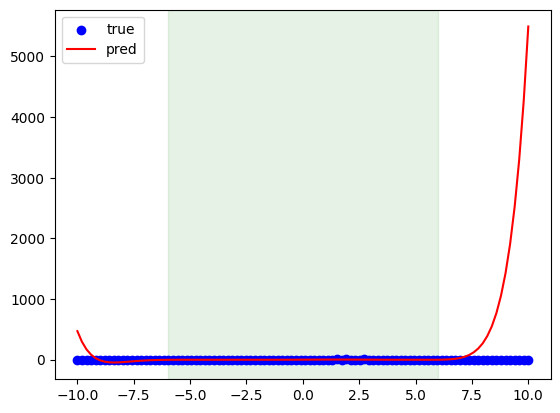

In [ ]:
y_pred = lr2.predict(get_features2(x_test))

plt.axvspan(-6, 6, alpha=0.1, color='green')
plot(x_test, y_test, y_pred)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

In [ ]:
lr2.coef_

array([ 1.55313249e+00,  1.88538134e-01, -2.83926146e-01, -5.51406171e-02,
        2.00380805e-02,  3.78480100e-03, -6.18841938e-04, -1.04251305e-04,
        6.96461496e-06,  1.01544183e-06])

### Придумаем что-нибудь умное

MSE: 1.927996465068679


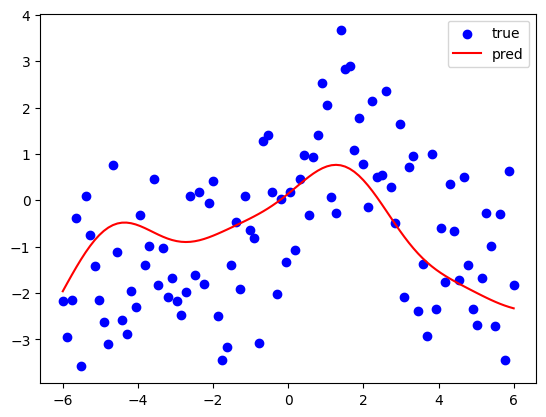

In [ ]:
def features_smart(x):
    x = x.reshape((-1, 1))

    return np.concatenate([x** 2, np.sin(x), np.sin(x) ** 2, np.cos(x)], axis=1)

features = features_smart(x)

lr_smart = LinearRegression().fit(features, y)
y_pred = lr_smart.predict(features)

plot(x, y, y_pred)
print(f'MSE: {mean_squared_error(y, y_pred)}')

MSE: 3.106803846314961


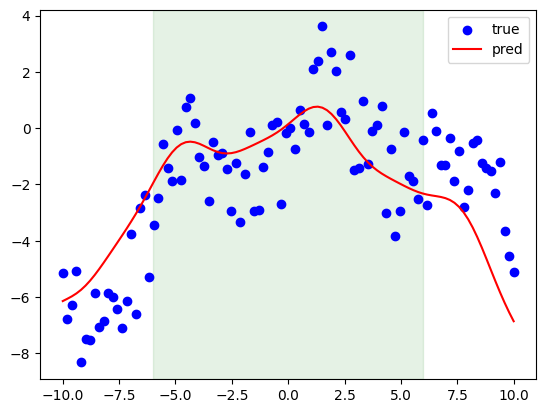

In [ ]:
y_pred = lr_smart.predict(features_smart(x_test))

plt.axvspan(-6, 6, alpha=0.1, color='green')
plot(x_test, y_test, y_pred)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

## Ещё sklearn

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
plasma_retinol = fetch_openml(data_id=511, as_frame=True)

# Research the dataset

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.model_selection import train_test_split

data = plasma_retinol.data
y = plasma_retinol.target

# Split the dataset into train and test

In [ ]:
y

0      915
1      727
2      721
3      615
4      799
      ... 
310    216
311    328
312    502
313    684
314    826
Name: RETPLASMA, Length: 315, dtype: int64

In [ ]:
data.sample(3)

,AGE,SEX,SMOKSTAT,QUETELET,VITUSE,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA
163,23,Female,Never,20.12592,Yes_fairly_often,2219.1,120.9,13.1,2.0,415.8,2430,746,104
4,72,Female,Never,20.98504,Yes_fairly_often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92
112,39,Female,Never,30.29128,No,1256.7,43.7,5.3,0.3,133.6,683,627,162


In [ ]:
data['SMOKSTAT'].value_counts()

Never             157
Former            115
Current_Smoker     43
Name: SMOKSTAT, dtype: int64

In [ ]:
data.dtypes

AGE               int64
SEX            category
SMOKSTAT       category
QUETELET        float64
VITUSE         category
CALORIES        float64
FAT             float64
FIBER           float64
ALCOHOL         float64
CHOLESTEROL     float64
BETADIET          int64
RETDIET           int64
BETAPLASMA        int64
dtype: object

In [ ]:
data.dtypes[(data.dtypes != 'category')]

AGE              int64
QUETELET       float64
CALORIES       float64
FAT            float64
FIBER          float64
ALCOHOL        float64
CHOLESTEROL    float64
BETADIET         int64
RETDIET          int64
BETAPLASMA       int64
dtype: object

In [ ]:
data.dtypes[(data.dtypes != 'category')].index

Index(['AGE', 'QUETELET', 'CALORIES', 'FAT', 'FIBER', 'ALCOHOL', 'CHOLESTEROL',
       'BETADIET', 'RETDIET', 'BETAPLASMA'],
      dtype='object')

In [ ]:
data.shape

(315, 13)

In [ ]:
X_cat = data[data.dtypes[(data.dtypes == 'category')].index]
X_cat.sample(4)

,SEX,SMOKSTAT,VITUSE
144,Male,Former,No
173,Female,Former,No
36,Female,Former,Yes_not_often
95,Male,Never,Yes_not_often


In [ ]:
X_num = data[data.dtypes[(data.dtypes != 'category')].index]
X_num.sample(4)

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA
31,33,20.56960,3144.8,155.0,17.6,4.1,308.8,3141,1579,182
176,71,24.46343,1850.5,75.9,16.1,7.2,247.9,3054,629,85
159,46,39.40624,1207.1,42.8,11.6,0.0,155.1,1462,868,118
287,51,24.90822,2166.9,105.8,15.6,0.0,349.1,4098,909,407


In [ ]:
X_num.describe()

,AGE,QUETELET,CALORIES,FAT,FIBER,ALCOHOL,CHOLESTEROL,BETADIET,RETDIET,BETAPLASMA
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,50.146032,26.157374,1796.654603,77.033333,12.788571,3.279365,242.460635,2185.603175,832.714286,189.892063
std,14.575226,6.013550,680.347435,33.829443,5.330192,12.322880,131.991614,1473.886547,589.289030,183.000803
min,19.000000,16.331140,445.200000,14.400000,3.100000,0.000000,37.700000,214.000000,30.000000,0.000000
25%,39.000000,21.799715,1338.000000,53.950000,9.150000,0.000000,155.000000,1116.000000,480.000000,90.000000
50%,48.000000,24.735250,1666.800000,72.900000,12.100000,0.300000,206.300000,1802.000000,707.000000,140.000000
75%,62.500000,28.853415,2100.450000,95.250000,15.600000,3.200000,308.850000,2836.000000,1037.000000,230.000000
max,83.000000,50.403330,6662.200000,235.900000,36.800000,203.000000,900.700000,9642.000000,6901.000000,1415.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split([0,1,2,3,4,5], [0,1,2,3,4,5])

[[3, 0, 5, 2], [4, 1], [3, 0, 5, 2], [4, 1]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.3, random_state=13)

In [ ]:
for x in [X_train_num, X_test_num, y_train, y_test]:
  print(x.shape)

(220, 10)
(95, 10)
(220,)
(95,)


In [ ]:
lr = LinearRegression().fit(X_train_num, y_train)

y_pred = lr.predict(X_test_num)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 89614.52168358224


In [ ]:
y_pred_train = lr.predict(X_train_num)
print(f'MSE: {mean_squared_error(y_train, y_pred_train)}')

MSE: 36318.682787227866


In [ ]:
y_const = y_train.mean() + np.zeros(len(y_test))
print(f'MSE: {mean_squared_error(y_test, y_const)}')

MSE: 47952.6203077425


In [ ]:
y_const = y_train.mean() + np.zeros(len(y_train))
print(f'MSE: {mean_squared_error(y_train, y_const)}')

MSE: 41575.65907024793


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Try it yourself

scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [ ]:
X_train_num_scaled

array([[-0.18148364,  0.75465624,  1.789288  , ...,  0.14866008,
         0.89854729, -0.17660096],
       [-0.31659837, -0.74202959, -0.34776521, ...,  0.81832506,
        -0.4845086 ,  0.10513696],
       [ 0.22386053, -0.03477849, -0.09807625, ..., -0.71567495,
        -0.32010374,  0.45316616],
       ...,
       [ 0.76431944, -0.00831207, -0.05543855, ..., -0.06547698,
        -1.17295395,  0.23771951],
       [-1.19484409,  0.11926416,  2.70002282, ...,  0.2167946 ,
         1.35066066, -0.64616416],
       [ 1.3723357 , -0.25826923,  0.10509885, ...,  0.49257717,
        -0.37764544, -0.59092143]])

In [ ]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, lr)
# Train the pipeline

In [ ]:
y_pred = pipeline.predict(X_train_num)
print(f'MSE: {mean_squared_error(y_train, y_pred)}')

MSE: 81476.06708694766


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = pipeline.predict(X_test_num)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 89179.00707130539


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
X_cat = data[data.dtypes[(data.dtypes == 'category')].index]
X_cat.sample(4)

,SEX,SMOKSTAT,VITUSE
43,Female,Current_Smoker,Yes_not_often
0,Female,Former,Yes_fairly_often
148,Female,Never,Yes_fairly_often
73,Female,Current_Smoker,No


In [ ]:
X_train_cat, X_test_cat = train_test_split(X_cat, test_size=0.3, random_state=13)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()
# Try it yourself

encoder.fit(X_train_cat)
X_train_cat_scaled = encoder.transform(X_train_cat)
X_test_cat_scaled = encoder.transform(X_test_cat)

In [ ]:
X_train_cat_scaled.shape

(220, 8)

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector

transformer = make_column_transformer(
    (scaler, make_column_selector(dtype_include=float)),
    (encoder, make_column_selector(dtype_exclude=float))
)
# Try it yourself

In [ ]:
pipeline = make_pipeline(transformer, lr)
# Train the pipeline

In [ ]:
y_pred = pipeline.predict(data.loc[train_ix])
print(f'MSE: {mean_squared_error(y_train, y_pred)}')

In [ ]:
y_pred = pipeline.predict(data.loc[test_ix])
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

## Регуляризация

In [ ]:
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
y_pred = lr.fit(X, y).predict(X)
plot(X, y, y_pred)
for alpha in np.logspace(-1, 3, 5, base=10):
    y_pred = Ridge(alpha=alpha).fit(X, y).predict(X)
    plt.plot(X, y_pred, label=f'alpha={alpha}')
plt.legend()

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
y_pred = lr.fit(X, y).predict(X)
plot(X, y, y_pred)
for alpha in np.logspace(-1, 3, 5, base=10):
    y_pred = Lasso(alpha=alpha).fit(X, y).predict(X)
    plt.plot(X, y_pred, label=f'alpha={alpha}')
plt.legend()

In [ ]:
X, y = make_regression(n_samples=100, n_features=150, n_informative=10,
                       noise=.1, random_state=42, effective_rank=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

In [ ]:
ridge = Ridge(alpha=.01).fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_ridge)}")

In [ ]:
lasso = Lasso(alpha=.01).fit(X_train, y_train)
y_lasso = lasso.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_lasso)}")

In [ ]:
plt.bar(range(lr.coef_.shape[0]), sorted(lr.coef_))

In [ ]:
plt.bar(range(ridge.coef_.shape[0]), sorted(ridge.coef_))

In [ ]:
plt.bar(range(lasso.coef_.shape[0]), sorted(lasso.coef_))